# PCA - Hand Gesture prediction

Dataset: https://www.kaggle.com/kyr7plus/emg-4 

The dataset is built for classification of hand gestures. It contains four measurement classes - rock, scissors, paper and ok. The dataset contains 64 features and one target column. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading dataset

In [2]:
!wget "https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/0.csv"
!wget "https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/1.csv"
!wget "https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/2.csv"
!wget "https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/3.csv"

--2022-09-07 11:00:36--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/0.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 927477 (906K) [text/plain]
Saving to: ‘0.csv’

0.csv               100%[===================>] 905.74K  --.-KB/s    in 0.03s   

2022-09-07 11:00:37 (31.2 MB/s) - ‘0.csv’ saved [927477/927477]

--2022-09-07 11:00:37--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 892654 (872K) [text/plain]
Saving t

In [3]:
text_0=pd.read_csv('/content/0.csv', header=None)
text_1=pd.read_csv('/content/1.csv', header=None)
text_2=pd.read_csv('/content/2.csv', header=None)
text_3=pd.read_csv('/content/3.csv', header=None)

In [4]:
text_0.shape, text_1.shape, text_2.shape, text_3.shape

((2910, 65), (2903, 65), (2943, 65), (2922, 65))

Each file contains data for one class. Out of 65 columns, 64 columns contain the measurements and the last one is the target. All four classes are balanced. 

## Understanding data

In [5]:
text_0.describe

<bound method NDFrame.describe of         0    1    2    3     4     5      6     7     8    9   ...    55  \
0     26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ... -28.0   
1    -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -25.0   
2    -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -83.0   
3      2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ... -38.0   
4      6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...  38.0   
...    ...  ...  ...  ...   ...   ...    ...   ...   ...  ...  ...   ...   
2905 -12.0  0.0  0.0 -7.0  -4.0  -3.0   -1.0  -5.0   4.0 -1.0  ...  12.0   
2906  -9.0 -1.0 -2.0  1.0 -13.0 -14.0  -59.0  -4.0  -9.0  0.0  ...  20.0   
2907   3.0 -2.0 -2.0  4.0  18.0  -5.0  -31.0   7.0  -3.0 -3.0  ...  34.0   
2908  -2.0 -2.0 -2.0  1.0  -3.0 -17.0  -33.0 -13.0   3.0  2.0  ...  -4.0   
2909   0.0 -2.0 -3.0 -2.0   2.0   5.0   18.0  -1.0  -5.0 -2.0  ...  -2.0   

        56   57   58    59    60    61     62    63  

In [6]:
text_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2910 entries, 0 to 2909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2910 non-null   float64
 1   1       2910 non-null   float64
 2   2       2910 non-null   float64
 3   3       2910 non-null   float64
 4   4       2910 non-null   float64
 5   5       2910 non-null   float64
 6   6       2910 non-null   float64
 7   7       2910 non-null   float64
 8   8       2910 non-null   float64
 9   9       2910 non-null   float64
 10  10      2910 non-null   float64
 11  11      2910 non-null   float64
 12  12      2910 non-null   float64
 13  13      2910 non-null   float64
 14  14      2910 non-null   float64
 15  15      2910 non-null   float64
 16  16      2910 non-null   float64
 17  17      2910 non-null   float64
 18  18      2910 non-null   float64
 19  19      2910 non-null   float64
 20  20      2910 non-null   float64
 21  21      2910 non-null   float64
 22  

The line below prints True for each class if all instances of each file belong to only one class:

In [7]:
text_0.iloc[:,-1].value_counts()==2910, text_1.iloc[:,-1].value_counts()==2903, text_2.iloc[:,-1].value_counts()==2943, text_3.iloc[:,-1].value_counts()==2922

(0    True
 Name: 64, dtype: bool, 1    True
 Name: 64, dtype: bool, 2    True
 Name: 64, dtype: bool, 3    True
 Name: 64, dtype: bool)

Checking if there is any null value in the four files:

In [8]:
print('Number of null values in text_0: ',text_0.isna().sum().sum()),
print('Number of null values in text_1: ',text_1.isna().sum().sum()),
print('Number of null values in text_2: ',text_2.isna().sum().sum()),
print('Number of null values in text_3: ',text_3.isna().sum().sum())

Number of null values in text_0:  0
Number of null values in text_1:  0
Number of null values in text_2:  0
Number of null values in text_3:  0


Defining a list containing the path of the files in a list for concatenation.

In [9]:
allFiles=['/content/0.csv','/content/1.csv','/content/2.csv','/content/3.csv']

list = []
for file in allFiles:
    read = pd.read_csv(file, header = None)
    list.append(read)
df = pd.concat(list)

In [10]:
df.shape

(11678, 65)

The joined dataset contains 11678 instances and 65 columns. Let's see a countplot of each class:

Text(0, 0.5, 'Count')

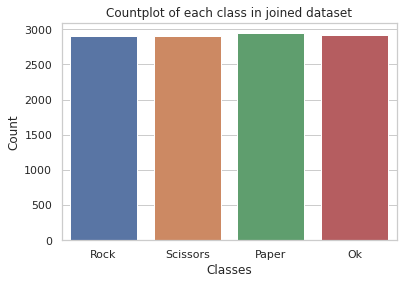

In [11]:
sns.set(style='whitegrid')
df_copy=df.copy(deep=True)
df_copy.loc[:,64]=(df_copy.loc[:,64]).replace(0,'Rock').replace(1,'Scissors').replace(2,'Paper').replace(3,'Ok')
sns.countplot(x=64,data=df_copy)
plt.title('Countplot of each class in joined dataset')
plt.xlabel('Classes')
plt.ylabel('Count')

## Preparing dataset for model building

Function for reading, concatenating, creating training/testing datasets.

In [12]:
def read_data():
    print(allFiles)
    list = []
    for file in allFiles:
        read = pd.read_csv(file, header = None)
        list.append(read)
    df = pd.concat(list)
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, -1].values
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15)
    return Xtrain, Xtest, Ytrain, Ytest, X, Y

In [13]:
X_train, X_test, y_train, y_test, X, Y = read_data()

['/content/0.csv', '/content/1.csv', '/content/2.csv', '/content/3.csv']


The next line Prints the shape of each set created we can confirm that the function has worked properly and our data is ready to be used by our model.

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9926, 64), (1752, 64), (9926,), (1752,))

In [15]:
X.shape, Y.shape

((11678, 64), (11678,))

Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

In [17]:
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

## Reference model building


In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

In [19]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 69 kB/s 


In [20]:
from catboost import Pool, CatBoostClassifier

In [21]:
model = CatBoostClassifier(iterations=300,
                           learning_rate=0.7,
                           random_seed=42,
                           depth=5)

model.fit(X_train_scaled, y_train, 
          cat_features=None, 
          eval_set=(X_test_scaled, y_test), 
          verbose=False)

In [22]:
prediction=model.predict(X_test_scaled)

In [23]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       415
           1       0.97      0.98      0.98       476
           2       0.95      0.94      0.94       459
           3       0.93      0.95      0.94       402

    accuracy                           0.96      1752
   macro avg       0.96      0.96      0.96      1752
weighted avg       0.96      0.96      0.96      1752



## Principal Component Analysis:   
We will use PCA for 2-D/3-D visualizations of our 64 features dataset and also for building models with reduced dimension datasets.

### PCA for 2-D visualizations

In [24]:
from sklearn.decomposition import PCA

PCA1=PCA(n_components=2)
PCA1=PCA1.fit(X)

In [25]:
PCA1.explained_variance_ratio_

array([0.07220325, 0.07008467])

The ratio indicates how close the reduced components represent the original dataset. The ratio values are too low here.

In [26]:
PCA1.explained_variance_ratio_.sum()

0.14228792355547942

In [27]:
PCA1=PCA1.fit_transform(X)
PCA_df=pd.DataFrame(PCA1, columns = ['principal component 1', 'principal component 2'])
PCA_df

,principal component 1,principal component 2
0,-47.564744,-57.231163
1,-127.857632,-129.938494
2,-65.892730,0.783109
3,-82.782818,-48.109965
4,108.112260,114.746818
...,...,...
11673,-8.326894,39.471742
11674,11.821185,46.930988
11675,29.624396,53.031264
11676,-27.859342,47.040204


In [28]:
PCA_df = pd.concat([PCA_df, pd.DataFrame(Y, columns=['label'])], axis = 1)
PCA_df.head()

,principal component 1,principal component 2,label
0,-47.564744,-57.231163,0
1,-127.857632,-129.938494,0
2,-65.892730,0.783109,0
3,-82.782818,-48.109965,0
4,108.112260,114.746818,0


Plotting

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


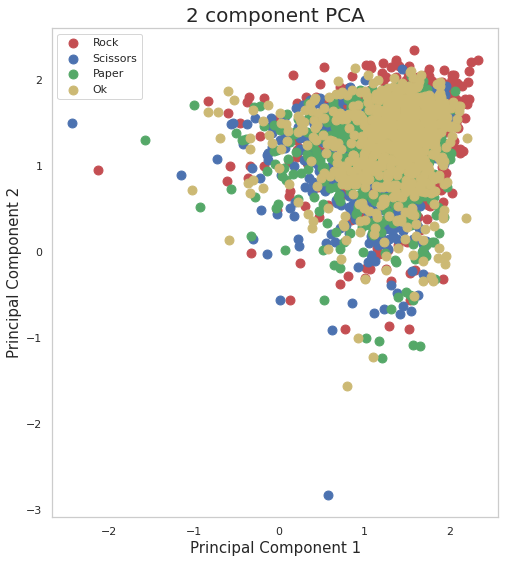

In [29]:
import plotly.express as px

fig = plt.figure(figsize = (8,9))
ax = fig.add_subplot(111)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

PCA_df['label']=PCA_df['label'].replace(0,'Rock').replace(1,'Scissors').replace(2,'Paper').replace(3,'Ok')
targets = ['Rock', 'Scissors', 'Paper', 'Ok']
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = (PCA_df['label'] == target)
    ax.scatter(np.log10(PCA_df.loc[indicesToKeep, 'principal component 1']),
              np.log10(PCA_df.loc[indicesToKeep, 'principal component 2']),
              c = color,
              s = 80)

ax.legend(targets)
ax.grid()
fig.show()


### PCA for 3-D visualizations

In [30]:
PCA2=PCA(n_components=3)
PCA2_df=PCA2.fit(X)

In [31]:
PCA2_df.explained_variance_ratio_

array([0.07220323, 0.07008467, 0.06072787])

In [32]:
PCA2_df.explained_variance_ratio_.sum()

0.20301577064758378

In [33]:
PCA2=PCA2.fit_transform(X)
PCA2_df=pd.DataFrame(PCA2, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
PCA2_df=np.log10(PCA2_df)

In [34]:
PCA2_df = pd.concat([PCA2_df, pd.DataFrame(Y, columns=['label'])], axis = 1)
PCA2_df['label']=PCA2_df['label'].replace(0,'Rock').replace(1,'Scissors').replace(2,'Paper').replace(3,'Ok')

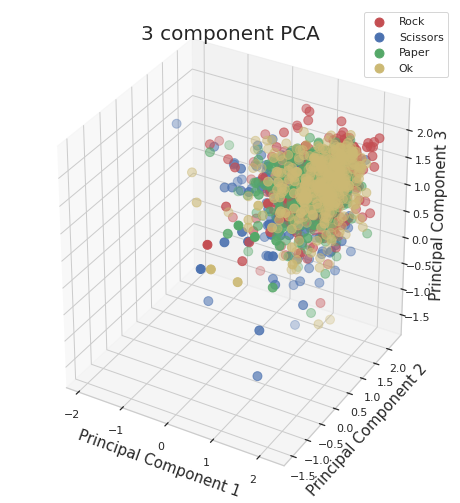

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,9))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Rock', 'Scissors', 'Paper', 'Ok']
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = (PCA2_df['label'] == target)
    ax.scatter(PCA2_df.loc[indicesToKeep, 'principal component 1']
               , PCA2_df.loc[indicesToKeep, 'principal component 2']
               , PCA2_df.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 80)
ax.legend(targets)
ax.grid()

## PCA for model buidling

In [36]:
#from sklearn.decomposition import PCA
features = 30
PCA3=PCA(n_components = features)
PCA3=PCA3.fit_transform(X)
PCA3=pd.DataFrame(PCA3)
PCA3

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-47.499273,-56.972027,-27.877823,-11.405827,116.625168,-48.077885,88.601569,6.707546,-70.714373,-32.159026,...,8.441259,-26.050635,42.142513,-19.804985,15.085216,56.726819,-50.296356,56.836647,19.439659,18.932534
1,-127.907957,-130.072147,-12.035303,7.047933,51.952884,-116.544694,15.913678,-68.812425,49.815383,5.617814,...,-7.759991,0.611187,-10.080972,12.621328,-23.049022,-39.643629,-6.173349,-19.871585,-2.726878,-11.945074
2,-65.917076,0.746078,161.220276,17.375793,-90.917782,-92.566896,-36.146659,70.233050,157.595115,-16.577495,...,-7.532065,-9.286597,45.838370,-32.245486,3.885631,11.902992,-34.088011,16.377350,18.173056,18.216139
3,-82.765890,-48.186119,33.913221,-59.648322,-57.323952,-99.766322,-102.986948,-75.760599,50.471700,37.881845,...,-30.754872,19.996990,9.021283,27.485831,-9.246745,32.252282,18.403567,22.070178,6.495217,-1.361986
4,108.170743,114.755310,-57.269056,76.256594,-7.677722,145.008430,-6.953144,57.983381,-49.677423,27.108406,...,-4.584817,13.964118,33.875863,-3.684628,-16.505822,-10.642599,-34.419215,29.451100,15.958113,17.659915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-8.306759,39.418555,-18.208644,28.554228,0.411066,-11.736326,35.669997,-12.611512,3.427349,27.299830,...,6.229906,7.391131,-0.864286,15.738432,-10.095585,10.357819,-22.753295,-14.629754,9.430801,28.981965
11674,11.823776,46.886812,55.916345,-10.956753,-42.286290,13.388870,60.347921,-0.745348,-21.456984,19.959538,...,2.852446,-2.779297,4.848026,19.168298,-8.743753,-8.583998,5.530601,1.250602,4.276146,-12.468486
11675,29.677788,53.036229,-36.854774,-13.069800,-9.245937,-20.270640,-3.909631,-31.838003,13.881837,23.949565,...,-3.880731,2.328777,2.901990,-8.799722,-3.570492,-18.005689,3.570199,-15.305471,2.333815,-1.394509
11676,-27.827810,46.890744,-14.290422,-17.811152,-48.674788,-30.451035,67.993525,20.004107,-0.736602,63.693271,...,3.110146,5.562583,12.502995,-7.651494,-0.160751,-4.047755,11.117294,15.023739,9.871426,-12.060132


In [37]:
df_pca = pd.concat([PCA3, pd.DataFrame(Y, columns=['label'])], axis = 1)
df_pca.shape

(11678, 31)

In [38]:
PCA3=PCA(n_components=features)
PCA3.fit(X)
PCA3.explained_variance_ratio_.sum()

0.8676576077571584

asAfter creating our new reduced dataset we have to do exactly the same process of modeling as you have seen earlier.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_val, label_train, label_val = train_test_split(df_pca.iloc[:,:-1], df_pca.iloc[:,-1], test_size=0.15, random_state=42)

In [41]:
X_train.shape, label_train.shape, X_val.shape, label_val.shape

((9926, 30), (9926,), (1752, 30), (1752,))

In [42]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_scaled = s.fit_transform(X_train)
X_val_scaled = s.transform(X_val)

Model building

In [43]:
model_pca = CatBoostClassifier(iterations=300,
                           learning_rate=0.7,
                           random_seed=42,
                           depth=5)

model_pca.fit(X_train_scaled, label_train, 
              cat_features=None, 
              eval_set=(X_val_scaled, label_val), 
              verbose=False)

In [44]:
prediction_pca=model_pca.predict(X_val_scaled)
model_pca.score(X_val_scaled, label_val)

0.8236301369863014

In [45]:
print(classification_report(label_val, prediction_pca))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       449
           1       0.78      0.86      0.82       444
           2       0.79      0.72      0.75       437
           3       0.76      0.77      0.76       422

    accuracy                           0.82      1752
   macro avg       0.82      0.82      0.82      1752
weighted avg       0.83      0.82      0.82      1752



Below we will print the explained variance ratio for each reduced dataset.

In [46]:
pca_list = []

for n in [5, 10, 20, 30, 40, 50, 60]:
  PCAmod = PCA(n_components=n)
  PCAmod.fit(X)
  pca_list.append(PCAmod.explained_variance_ratio_.sum())

In [47]:
pd.DataFrame(pca_list, index=[[5, 10, 20, 30, 40, 50, 60]], columns=['Explained variance'])

,Explained variance
5,0.310862
10,0.518246
20,0.746350
30,0.867697
40,0.942348
50,0.982708
60,0.998243


In [48]:
accuracies = []

for n in [5, 10, 20, 30, 40, 50, 60]:
  PCAmod = PCA(n_components=n)
  PCAmod = PCAmod.fit_transform(X)
  PCAmod = pd.DataFrame(PCAmod)
  df_pca = pd.concat([PCAmod, pd.DataFrame(Y, columns=['label'])], axis = 1)
  X_train, X_val, label_train, label_val = train_test_split(df_pca.iloc[:,:-1], df_pca.iloc[:,-1], test_size=0.15, random_state=42)
  X_train_scaled = s.fit_transform(X_train)
  X_val_scaled = s.transform(X_val)
  model_pca.fit(X_train_scaled, label_train, cat_features=None, eval_set=(X_val_scaled, label_val), verbose=False)
  accuracies.append(model_pca.score(X_val_scaled,label_val))


In [49]:
pd.DataFrame(accuracies, index=[[5, 10, 20, 30, 40, 50, 60]], columns=['accuracy'])

,accuracy
5,0.420662
10,0.595320
20,0.702055
30,0.819635
40,0.876712
50,0.895548
60,0.910388


The full dataset gave an accuracy score of 95.14%. Compare this with the accuracies for dimensions 30 and above. 